In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2

Se importa la imagen a usar

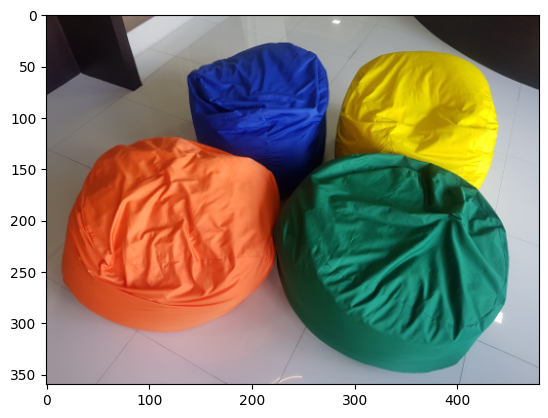

In [2]:

img=cv2.imread(r"bags.png")
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #cv2 importa imagenes como BGR, con este la volvemos a RGB
plt.imshow(img);
plt.show()

Primer metodo(El segundo visto en clase)

Obtención de valores de HUE, de saturación/transparencia y de "valor"

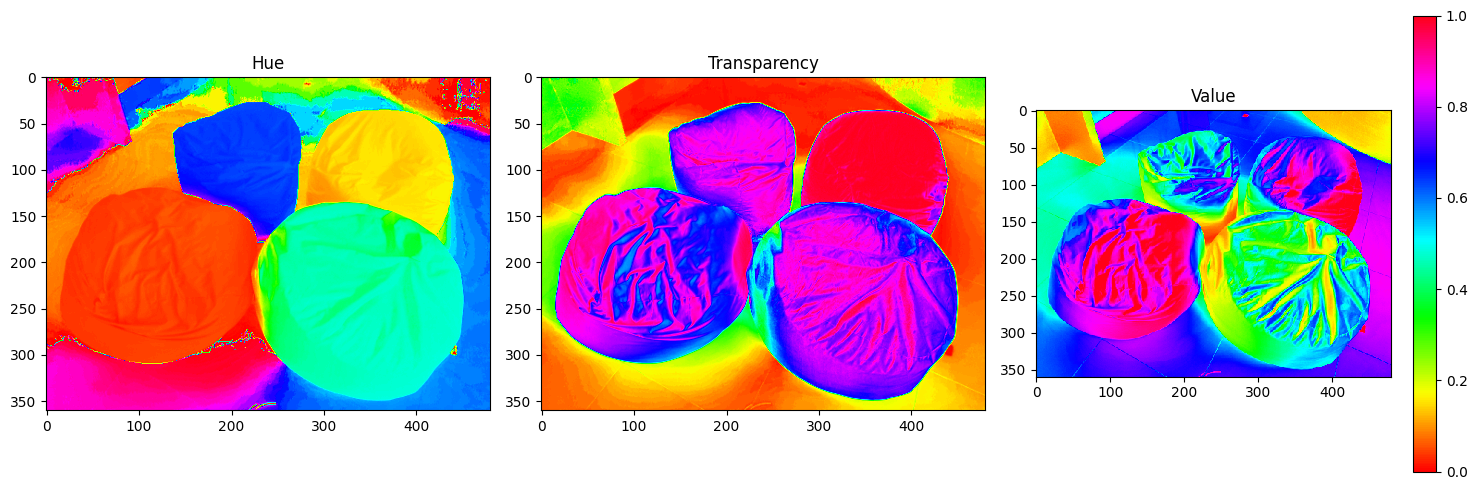

In [3]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
hsv_img=rgb2hsv(img)
fig, ax =plt.subplots(1,3,figsize=(15,5))
ax[0].imshow(hsv_img[:,:,0],cmap="hsv")
ax[0].set_title("Hue")
ax[1].imshow(hsv_img[:,:,1],cmap="hsv")
ax[1].set_title("Transparency")
ax[2].imshow(hsv_img[:,:,2],cmap="hsv")
ax[2].set_title("Value")
fig.colorbar(imshow(hsv_img[:,:,2],cmap='hsv')) #Por alguna razon el colorbar cambia igualmente el valor del que estas usando de referencia :( 
fig.tight_layout()

Bolsa naranja

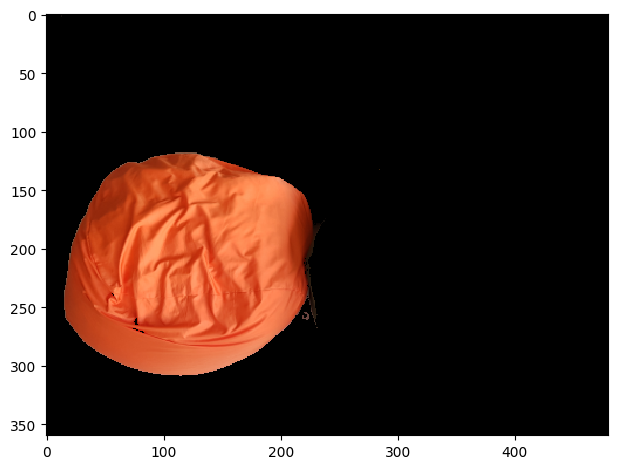

In [4]:
hsv_img=rgb2hsv(img)
lower_mask=hsv_img[:,:,0]>0.018
upper_mask=hsv_img[:,:,0]<0.085
saturation_mask=hsv_img[:,:,1]>0.4

mask2=upper_mask*lower_mask*saturation_mask
red=img[:,:,0]*mask2
green=img[:,:,1]*mask2
blue=img[:,:,2]*mask2
img_maskedo=np.dstack((red,green,blue))
imshow(img_maskedo)

Bolsa azul

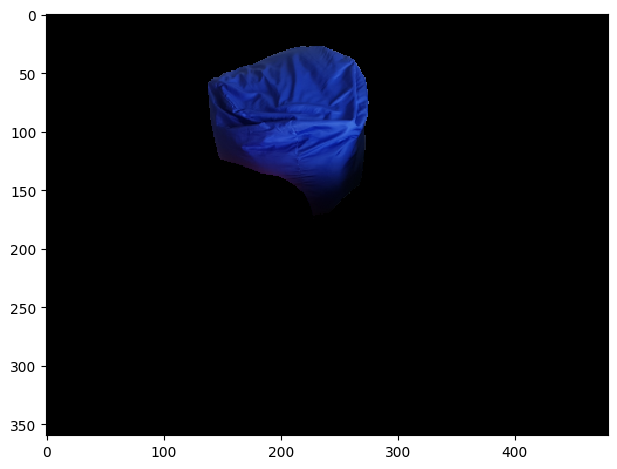

In [5]:
hsv_img=rgb2hsv(img)
lower_mask=hsv_img[:,:,0]>0.509
upper_mask=hsv_img[:,:,0]<0.79
saturation_mask=hsv_img[:,:,1]>0.4

mask2=upper_mask*lower_mask*saturation_mask
red=img[:,:,0]*mask2
green=img[:,:,1]*mask2
blue=img[:,:,2]*mask2
img_maskedb=np.dstack((red,green,blue))
imshow(img_maskedb)

Bolsa verde

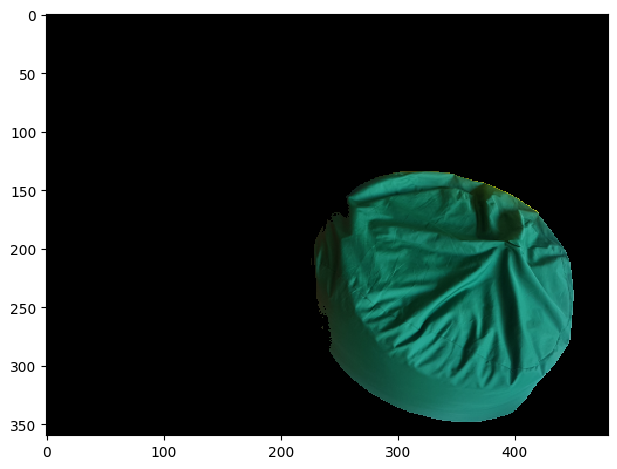

In [6]:
hsv_img=rgb2hsv(img)
lower_mask=hsv_img[:,:,0]>0.17
upper_mask=hsv_img[:,:,0]<0.5
saturation_mask=hsv_img[:,:,1]>0.4

mask2=upper_mask*lower_mask*saturation_mask
red=img[:,:,0]*mask2
green=img[:,:,1]*mask2
blue=img[:,:,2]*mask2
img_maskedg=np.dstack((red,green,blue))
imshow(img_maskedg)

Bolsa amarilla

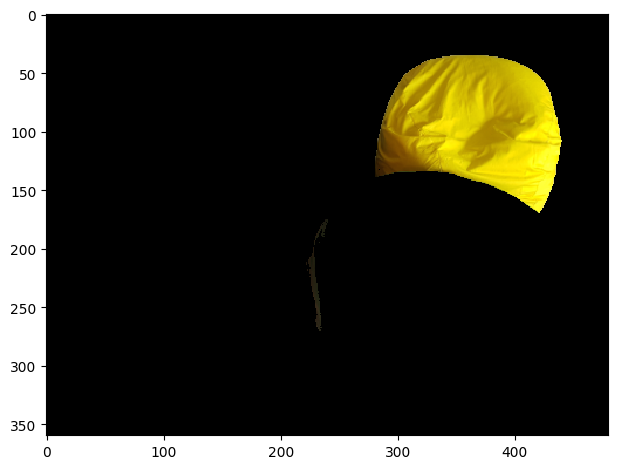

In [18]:
hsv_img=rgb2hsv(img)
lower_mask=hsv_img[:,:,0]>0.085
upper_mask=hsv_img[:,:,0]<0.2
saturation_mask=hsv_img[:,:,1]>0.4

mask2=upper_mask*lower_mask*saturation_mask
red=img[:,:,0]*mask2
green=img[:,:,1]*mask2
blue=img[:,:,2]*mask2
img_maskedy=np.dstack((red,green,blue))
imshow(img_maskedy)

La razón por la que el borde de la bolsa verde no es posible de eliminar es debido a la forma en la que la luz se comporta, esto obra del rebote de la luz de la bolsa naranja en la luz verde lo cual causa un color que se encuentra en el rango de color de la bolsa amarilla. Si lograramos eliminarlo entonces perderiamos un buen pedazo de la bolsa amarilla.

Enmascaramos las 4 imagenes para poder hacer una imagen conjunta de las 4 bolsas

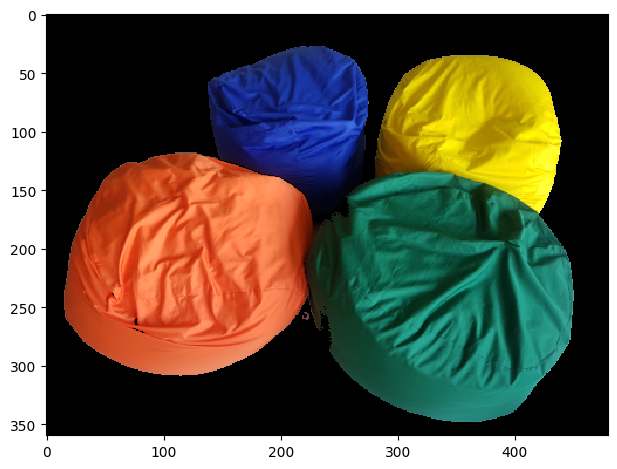

In [19]:
maskedmask=cv2.bitwise_or(src1=img_maskedo,src2=img_maskedb)
maskedmask=cv2.bitwise_or(src1=maskedmask,src2=img_maskedg)
maskedmask=cv2.bitwise_or(src1=maskedmask,src2=img_maskedy)
imshow(maskedmask)

Segundo metodo(El primero visto en clase)
Mapa de color de colores RGB

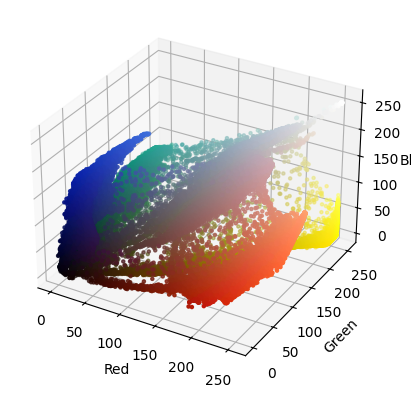

In [9]:
r,g,b = cv2.split(img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")
pixel_colors=img.reshape((np.shape(img)[0]*np.shape(img)[1],3))
norm=colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors=norm(pixel_colors).tolist()
axis.scatter(r.flatten(),g.flatten(),b.flatten(),facecolors=pixel_colors,marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Mapa de color en sistema HSV

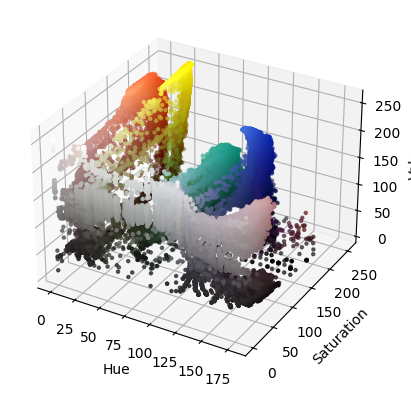

In [10]:
hsv_img=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h,s,v=cv2.split(hsv_img)
fig=plt.figure()
axis=fig.add_subplot(1,1,1,projection="3d")
axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolors=pixel_colors,marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Bolsa naranja

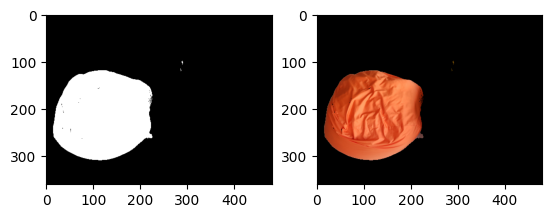

In [11]:
dark_orange=(1,100,100)
light_orange=(20,245,255)
mask=cv2.inRange(hsv_img,dark_orange,light_orange)
result1=cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result1)
plt.show()

Bolsa azul

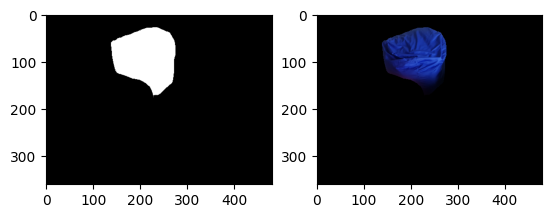

In [12]:
dark_blue = (100, 150, 0)
light_blue = (140, 255, 255)
mask=cv2.inRange(hsv_img,dark_blue,light_blue)
result2=cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result2)
plt.show()

Bolsa Verde

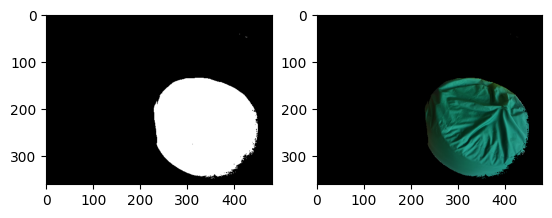

In [13]:
dark_green = (36, 20, 20)
light_green = (86, 255, 255)
mask=cv2.inRange(hsv_img,dark_green,light_green)
result3=cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result3)
plt.show()

Bola amarillla, al igual que en el metodo anterior La razón por la que el borde de la bolsa verde no es posible de eliminar es debido a la forma en la que la luz se comporta, esto obra del rebote de la luz de la bolsa naranja en la luz verde lo cual causa un color que se encuentra en el rango de color de la bolsa amarilla. Si lograramos eliminarlo entonces perderiamos un buen pedazo de la bolsa amarilla.

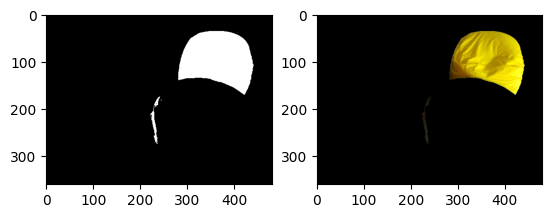

In [14]:
light_yellow=(40,255,255)
dark_yellow=(15,94,20)
mask=cv2.inRange(hsv_img,dark_yellow,light_yellow)
result4=cv2.bitwise_and(img,img,mask=mask)
plt.subplot(1,2,1)
plt.imshow(mask,cmap="gray")
plt.subplot(1,2,2)
plt.imshow(result4)
plt.show()

Enmascaramos las 4 imagenes para poder hacer una imagen conjunta de las 4 bolsas

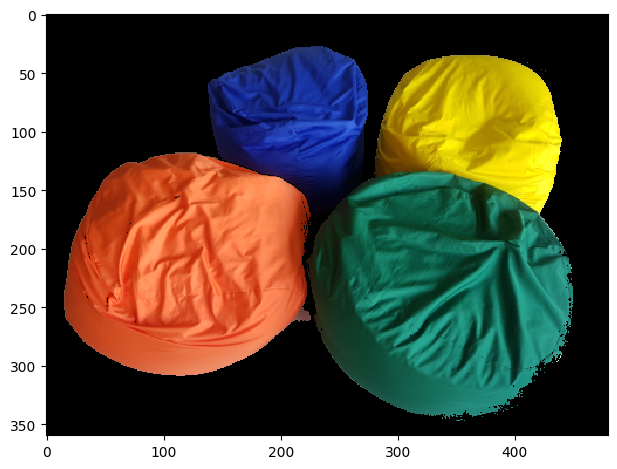

In [15]:
maskedmask=cv2.bitwise_or(src1=result1,src2=result2)
maskedmask=cv2.bitwise_or(src1=maskedmask,src2=result3)
maskedmask=cv2.bitwise_or(src1=maskedmask,src2=result4)
imshow(maskedmask)